170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 256s 158ms/step - accuracy: 0.1290 - loss: 2.3357 - val_accuracy: 0.2021 - val_loss: 2.1734
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 159ms/step - accuracy: 0.1654 - loss: 2.1792 - val_accuracy: 0.2336 - val_loss: 2.0865
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 257s 156ms/step - accuracy: 0.1795 - loss: 2.1458 - val_accuracy: 0.2469 - val_loss: 2.0246
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 156ms/step - accuracy: 0.1914 - loss: 2.1244 - val_accuracy: 0.2904 - val_loss: 2.0056
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 156ms/step - accuracy: 0.2019 - loss: 2.1106 - val_accuracy: 0.2647 - val_loss: 1.9989
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 155ms/step - accuracy: 0.2073 - loss: 2.0917 - val_accuracy: 0.2886 - val_loss: 1.9618
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 155ms/step - accuracy: 0.2083 - loss: 2.0890 

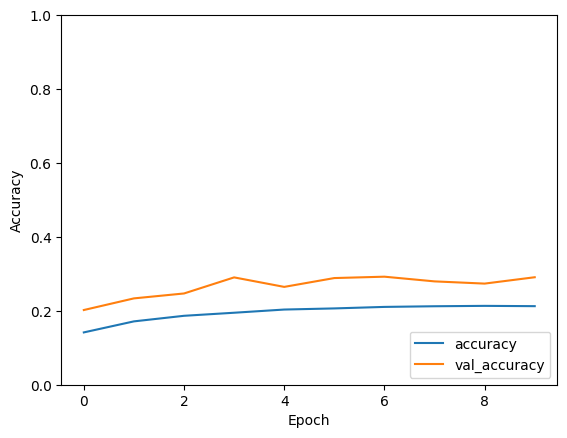

In [ ]:
# Necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Initialize a pre-trained ResNet50 model, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers in the base model
base_model.trainable = False

# Add a new classification head
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
